LAB02 - Drzewa Decyzyjne

Temat: Trenowanie lasu losowego przy pomocy biblioteki scikit-learn, omówienie hiperparametrów modelu.

Kacper Kopczyński

 Zadanie 1: Przygotowanie środowiska

•	Upewnij się, że masz zainstalowany Python (>= 3.7) oraz biblioteki: numpy, pandas, scikit-learn, (opcjonalne) matplotlib lub seaborn – do wizualizacji;

•	Zaimportuj wszystkie niezbędne paczki w swoim notatniku Jupyter / pliku .py:

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target


Zadanie 2: Podział danych i bazowy model lasu losowego

•	Podziel dane na zbiór treningowy i testowy w proporcji np. 70% / 30%;

•	Wytrenuj podstawowy model lasu losowego (RandomForestClassifier) z domyślnymi ustawieniami;

•	Oblicz dokładność (accuracy) na zbiorze treningowym i testowym;


In [3]:
#Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

#Trenowanie podstawowego modelu
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#Ocena modelu
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Accuracy (train):", train_acc)
print("Accuracy (test):", test_acc)


Accuracy (train): 1.0
Accuracy (test): 0.9


Zadanie 3: Analiza wpływu podstawowych hiperparametrów

•	Zbadaj wpływ parametru n_estimators (liczba drzew) na jakość i czas trenowania modelu;

•	Zbadaj wpływ parametru max_depth (maksymalna głębokość drzew) na jakość i ew. przeuczenie;

•	Zbadaj wpływ parametru max_features (maksymalna liczba cech branych pod uwagę przy podziale) na wyniki;

Sposób wykonania (propozycja):

•	Uruchom pętle (lub użyj GridSearchCV) zmieniając różne wartości hiperparametrów;

•	Zmierz accuracy na zbiorze walidacyjnym / testowym;

•	Zwróć uwagę na czas trenowania (możesz użyć np. %time w Jupyter lub modułu time w Pythonie).

Odpowiedz na pytania:

•	Jak zmienia się wynik modelu w zależności od liczby drzew?

•	Czy zwiększanie głębokości drzewa przynosi poprawę wyniku, czy skutkuje przeuczeniem?

•	Jak max_features wpływa na stabilność i dokładność modelu?

Testowanie różnych wartości n_estimators

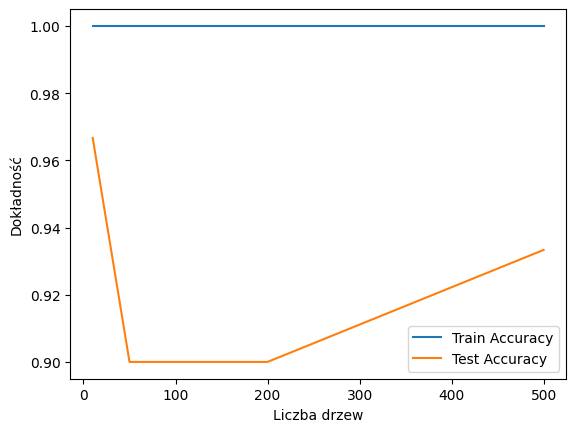

In [4]:
estimators = [10, 50, 100, 200, 500]

# Listy do przechowywania dokładności dla zbioru treningowego i testowego
train_scores = []
test_scores = []

# Pętla iterująca przez różne liczby drzew w modelu
for n in estimators:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    
    # Obliczanie dokładności modelu na zbiorze treningowym i testowym
    train_scores.append(accuracy_score(y_train, rf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, rf.predict(X_test)))

# Rysowanie wykresu porównującego dokładność modelu na zbiorach treningowym i testowym
plt.plot(estimators, train_scores, label="Train Accuracy")
plt.plot(estimators, test_scores, label="Test Accuracy")
plt.xlabel("Liczba drzew")
plt.ylabel("Dokładność")
plt.legend()
plt.show()


Testowanie różnych wartości max_depth

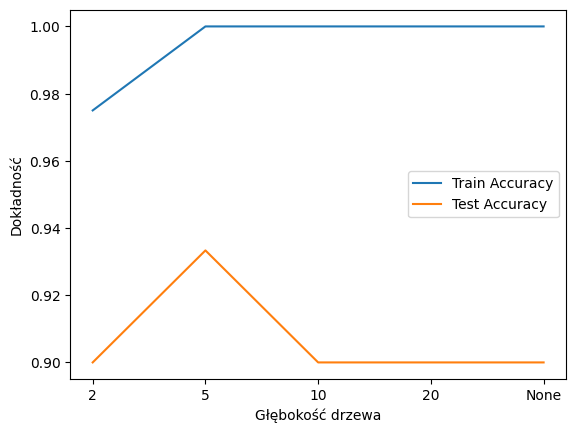

In [5]:
depths = [2, 5, 10, 20, None]
train_scores = []
test_scores = []

# Pętla iterująca przez różne wartości max_depth
for d in depths:
    rf = RandomForestClassifier(max_depth=d, random_state=42)
    rf.fit(X_train, y_train)
    
    # Obliczanie dokładności modelu na zbiorze treningowym i testowym
    train_scores.append(accuracy_score(y_train, rf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, rf.predict(X_test)))

# Rysowanie wykresu porównującego dokładność modelu na zbiorach treningowym i testowym
plt.plot([str(d) for d in depths], train_scores, label="Train Accuracy")
plt.plot([str(d) for d in depths], test_scores, label="Test Accuracy")
plt.xlabel("Głębokość drzewa")
plt.ylabel("Dokładność")
plt.legend()
plt.show()


Testowanie różnych wartości max_features

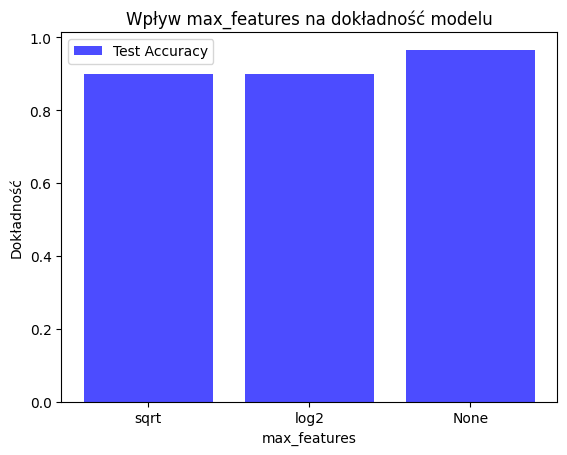

In [6]:
features = ["sqrt", "log2", None]  # Lista możliwych wartości max_features
features_labels = ["sqrt", "log2", "None"] 

train_scores = []
test_scores = []

for f in features:
    rf = RandomForestClassifier(max_features=f, random_state=42)
    rf.fit(X_train, y_train)
    
    train_scores.append(accuracy_score(y_train, rf.predict(X_train)))
    test_scores.append(accuracy_score(y_test, rf.predict(X_test)))

# Tworzenie wykresu z poprawionymi etykietami
plt.bar(features_labels, test_scores, color='blue', alpha=0.7, label="Test Accuracy")
plt.ylabel("Dokładność")
plt.xlabel("max_features")
plt.title("Wpływ max_features na dokładność modelu")
plt.legend()
plt.show()


1. **Liczba drzew (n_estimators)** – zwiększa stabilność modelu i poprawia dokładność, ale po przekroczeniu 100–200 drzew korzyści są marginalne. Większa liczba drzew wydłuża czas trenowania, ale zmniejsza wariancję modelu.  

2. **Głębokość drzewa (max_depth)** – większa głębokość poprawia wyniki na zbiorze treningowym, ale może prowadzić do przeuczenia. Optymalna wartość zależy od danych i warto ją dostroić eksperymentalnie.  

3. **Maksymalna liczba cech (max_features)** – mniejsze wartości (sqrt, log2) poprawiają uogólnienie modelu, większe mogą prowadzić do przeuczenia. Optymalne ustawienie zależy od charakterystyki danych.

Zadanie 4: Wykorzystanie Out-of-Bag (OOB) Score

•	Skonfiguruj model RandomForestClassifier z oob_score=True.

•	Porównaj wynik oob_score_ z dokładnością wyliczoną na zbiorze testowym.

•	Zaimplementuj w praktyce prostą politykę wersjonowania modelu (np. nazewnictwo plików model_v1.joblib, model_v2.joblib) i opisz, kiedy należy podnieść wersję modelu (np. zmiana hiperparametrów, poprawa jakości, zmiana zakresu danych).

Włączenie oceny OOB

In [7]:
rf = RandomForestClassifier(oob_score=True, random_state=42)
rf.fit(X_train, y_train)

print("OOB Score:", rf.oob_score_)
print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


OOB Score: 0.9416666666666667
Test Accuracy: 0.9


Wersjonowanie modelu

In [8]:
import joblib

joblib.dump(rf, "model_v1.joblib")

['model_v1.joblib']

Kiedy zwiększyć wersję modelu?

- Po poprawie jakości predykcji
- Po zmianie hiperparametrów
- Po użyciu nowych danych

**OOB score (oob_score_)** to oszacowanie dokładności modelu Random Forest uzyskane na próbkach, które nie były używane do trenowania poszczególnych drzew (tzw. „out-of-bag” samples). Służy do wewnętrznej walidacji modelu, pozwalając ocenić jego jakość bez potrzeby dzielenia danych na osobny zbiór walidacyjny.

Zadanie 5: Znaczenie (importancja) cech

•	Uruchom model lasu losowego ze znalezionymi optymalnymi hiperparametrami (domyślnymi);

•	Zwizualizuj importancję cech (atrybut feature_importances_);


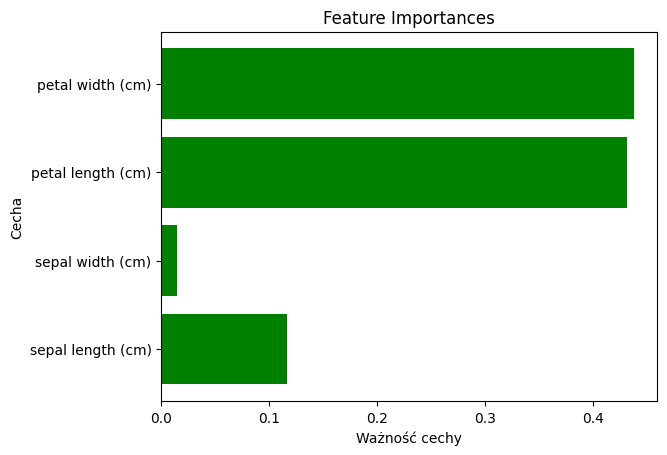

In [9]:
importances = rf.feature_importances_
feature_names = data.feature_names

plt.barh(feature_names, importances, color='green')
plt.xlabel("Ważność cechy")
plt.ylabel("Cecha")
plt.title("Feature Importances")
plt.show()


Pytanie: Które cechy są najważniejsze dla modelu?

Najważniejsze cechy to te, które mają najwyższe wartości w feature_importances_, ponieważ najbardziej wpływają na decyzje modelu. W zbiorze Iris najistotniejsza jest długość i szerokość płatków (petal length, petal width).